In [46]:
import matplotlib.pyplot as plt
import seaborn as sns
import json
import pandas as pd
from datetime import date
from os import path
sns.set()

In [47]:
def pad_dict_list(dict_list, padel):
    lmax = 0
    for lname in dict_list.keys():
        lmax = max(lmax, len(dict_list[lname]))
    for lname in dict_list.keys():
        ll = len(dict_list[lname])
        if  ll < lmax:
            dict_list[lname] += [padel] * (lmax - ll)
    return dict_list

In [48]:
name = "playername"

project_dir = r'C:\projects\rl_replays'
output_dir = r'player_jsons'
subpath = path.join(project_dir, output_dir)

with open(rf"{subpath}\{name}.json", 'r') as f:
    data_dict = json.load(f)

In [49]:
data_dict_2 = {}
for game_name, dict_ in data_dict.items():
    date_raw = dict_.pop('date')
    date_split = date_raw.split('-')
    date_fm = date(int(date_split[0]), int(date_split[1]), int(date_split[2].split(' ')[0]))
    data_dict_2[date_fm] = list(dict_.values())

In [50]:
for key, value in data_dict_2.copy().items():
    if value == []:
        data_dict_2.pop(key)

In [51]:
df = pd.DataFrame(pad_dict_list(data_dict_2, 0))

In [52]:
df = df.melt()
df = df[df['value'] < 0]
df.reset_index(inplace=True, drop=True)

In [53]:
df = df.sort_values('variable')
df['value'] = df['value'].abs()*100
df.head()

,variable,value
83,2017-09-20,11.765
84,2017-09-22,69.804
85,2017-09-24,87.843
86,2017-09-24,79.608
87,2017-09-24,33.725


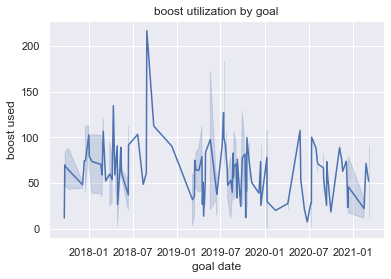

In [54]:
ax = sns.lineplot(x='variable', y='value', data=df)
ax.set(xlabel='goal date', ylabel='boost used', title='boost utilization by goal')
plt.show()